<a href="https://colab.research.google.com/github/kasattack567/Computer-Science/blob/main/Research_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction:


## **Task**:

Based on the text in these papers, implement the function (in Python, C++ or Rust),
which accepts three lists of integer values:

• Round numbers (correspond to n and r in the papers, respectively)

• Number of trials (shots) for each data point

• Number of trials (errors) of unsuccessful decoding among these shots

The fraction errors[r]/shots[r] correspond to E(r) in the papers.  Your function should
return a single floating-point value ε.


## **Method:**

The function calculates the logical error per round by analysing how fidelity decays with the number of error-correction rounds. It first determines the error rate from the input data and derives the corresponding fidelity. The natural logarithm of fidelity is then computed to linearise its exponential decay. A linear regression is performed on the transformed data to extract the slope, from which epsilon is calculated. The quality of the fit is assessed using the R^2 value, and the results are visualised with a scatter plot and a fitted straight line to validate the analysis.




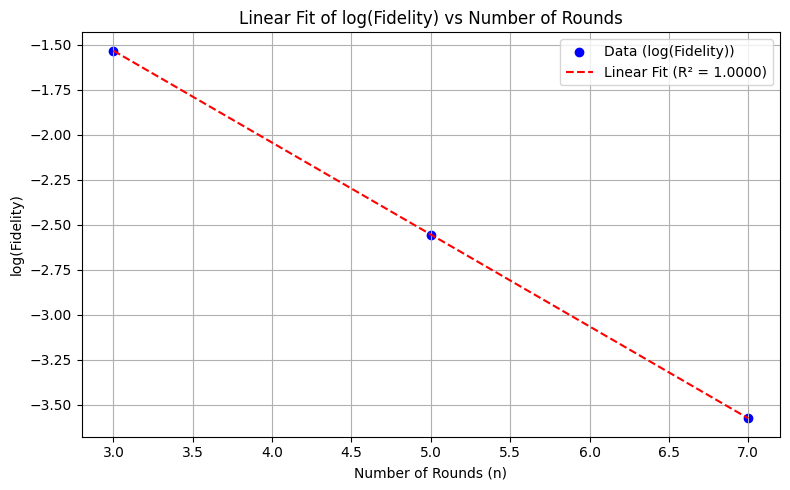

Logical Error per Round (ε): 0.199983
Goodness of Fit (R²): 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_ler_per_round(round_numbers, shots, errors) -> float:
    """
    Compute the logical error per round (ε).

    """
    # Convert inputs to numpy arrays
    round_numbers = np.array(round_numbers, dtype=float)
    shots = np.array(shots, dtype=float)
    errors = np.array(errors, dtype=float)

    # Compute error rates E(n) = errors / shots
    E = errors / shots
    # Compute fidelity F(n) = 1 - 2E(n)
    F = 1.0 - 2.0 * E

    # Discard the first data point as per the paper
    n_fit = round_numbers[1:]
    F_fit = F[1:]

    # Ensure F(n) > 0 for logarithm
    if np.any(F_fit <= 0):
        raise ValueError("Fidelity must be positive to take the logarithm.")

    # Compute log(Fidelity)
    log_F = np.log(F_fit)

    # Perform a linear fit: log(F(n)) = A + B * n
    B, A = np.polyfit(n_fit, log_F, 1)

    # Extract ε from the slope
    epsilon = (1 - np.exp(B)) / 2.0

    return epsilon

# Input data
round_numbers = [1, 3, 5, 7]
shots = [50000, 50000, 50000, 50000]
errors = [10000, 19600, 23056, 24300]

# Run the function and display results
epsilon = get_ler_per_round(round_numbers, shots, errors)
print(f"Logical Error per Round (ε): {epsilon:.6f}")


